#Mini-project: Advanced Statistical Analysis of Apple Inc. Stock Data



##Data Visualization

    ###Utilize Matplotlib to plot closing prices and traded volume over time.
    Create a candlestick chart to depict high and low prices.


##Statistical Analysis

    ###Compute summary statistics (mean, median, standard deviation) for key columns.
    Analyze closing prices with a moving average.


##Hypothesis Testing

    ###Execute a t-test to compare average closing prices across different years.
    Examine daily returns’ distribution and test for normality using SciPy.


##Advanced Statistical Techniques (Bonus)

    ###Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
        ####E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
        Analyze correlations between moving averages of closing prices and trading volume across time periods.


####FYI - It may include data such as date, opening price, closing price, high and low prices, and trading volume.

####This information can be used to study trends and patterns in the stock market and make informed investment decisions.

    ####Date: Represents the date of the stock price.
    Open: Represents the opening stock price on that date.
    High: Represents the highest stock price on that date.
    Low: Represents the lowest stock price on that date.
    Close: Represents the closing stock price on that date.
    Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
    Volume: Represents the number of shares traded on that date.


In [58]:
##1. Data Loading:
import numpy as np
import pandas as pd  ###Load the dataset using Pandas. Check for null values and understand data types.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from google.colab import files


uploaded = files.upload()

df = pd.read_csv("Stock.csv") # Take a quick look


print("Dataset Info:")
df.info()

print("\nFirst 5 rows:")
df.head(5)

print("Missing values:")
df.isnull().sum()

print("\nBasic Statistics:")
df.describe()



Saving Stock.csv to Stock (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB

First 5 rows:
Missing values:

Basic Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,10608.000000,10608.000000,10608.000000,10608.000000,10608.000000,1.060800e+04
mean,16.689173,16.879955,16.500822,16.697362,16.027345,3.275098e+08
std,35.450519,35.882848,35.031289,35.473912,35.154878,3.378203e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287946,0.296875,0.282355,0.288923,0.238909,1.213044e+08
50%,0.488839,0.495536,0.480446,0.487701,0.404851,2.145976e+08
75%,16.320893,16.418483,16.151249,16.269554,14.073167,4.066804e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,7.421641e+09


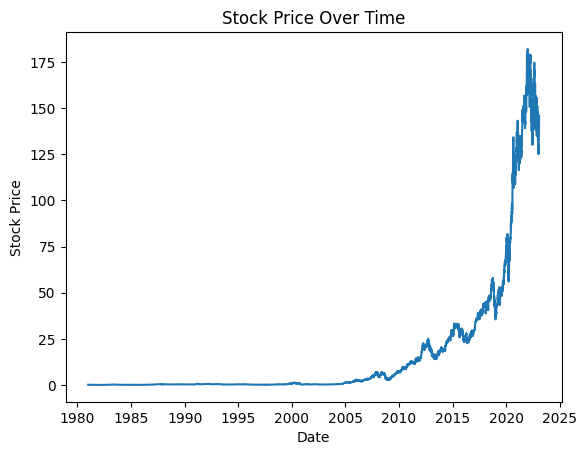

In [3]:
#1. Data Exploration

##Examine the time series properties of the data (e.g., frequency, trends).

###Analysis: Date is structured by DD/MM/YYYY (we may want to break it apart) and appears to be daily trading records (business days only). When plotted, stock shot up dramatically between 2010 - 2022. It was fairly flat between 1980  - 2005 then slowly inched upward.I guess it was around the iphone time.

df.head(5)

##2. Data Visualization: Utilize Matplotlib to plot closing prices and traded volume over time.

df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].describe()
df = df.sort_values('Date')

plt.plot(df['Date'], df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

##1. Data Loading and Exploration

    ###Loading Analysis: There are 10608 entries across 7 columns. There are no missing values. The data types are as follows: floats (5), integer (1), and object (1).

    ###Time Series Exploration: Date is structured by DD/MM/YYYY (we may want to break it apart) and appears to be daily trading records (business days only).

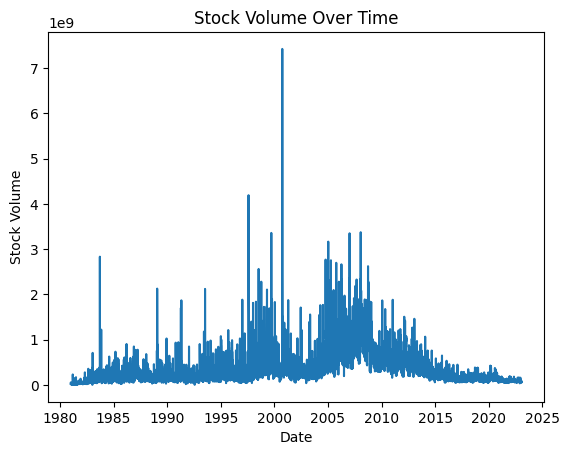

In [4]:
#2. Data Visualization

###traded volume

plt.plot(df['Date'], df['Volume'])
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volume')
plt.show()

#analysis: stock mostly released around early 2000s, suggesting that they were raising capital to roll out new tech


In [20]:
!pip install mplfinance

/usr/local/lib/python3.12/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


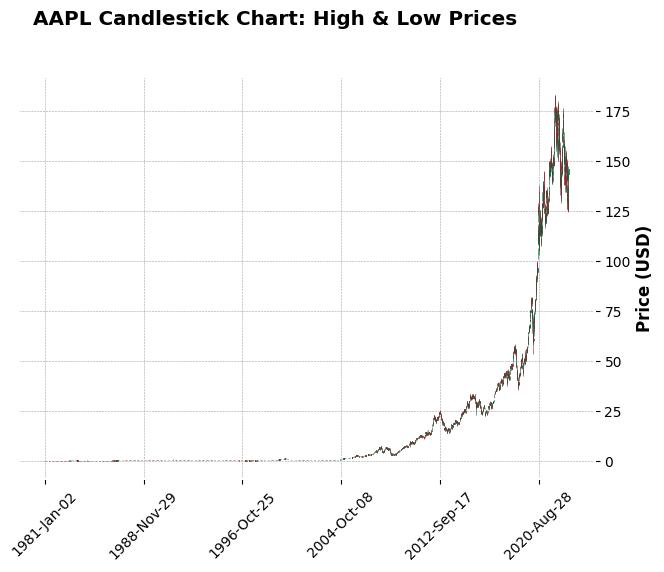

In [21]:
#candle chart

df_candle = df[['Date', 'Open', 'High', 'Low', 'Close']].copy()
df_candle.set_index('Date', inplace=True)

mpf.plot(
    df_candle,
    type='candle',
    style='charles',
    title='AAPL Candlestick Chart: High & Low Prices',
    ylabel='Price (USD)'
)

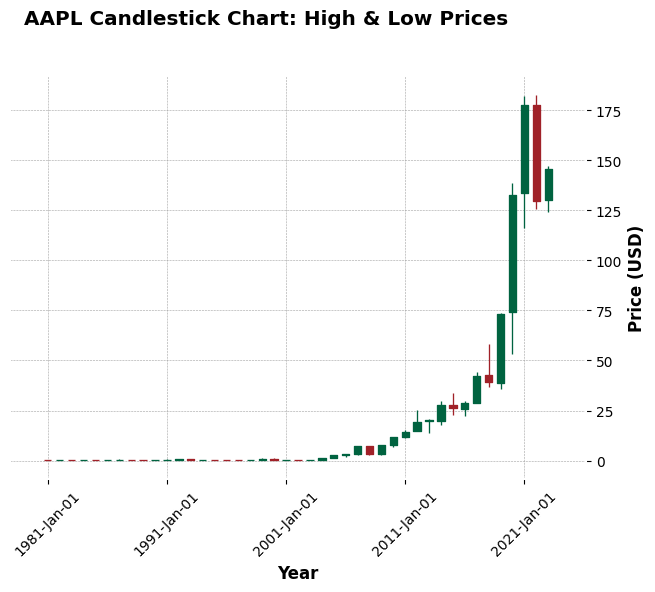

In [30]:
#plotting annually because too much data

df["Year"] = df["Date"].dt.year
df[["Date", "Year"]].head()

df_annually = df.groupby('Year').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

df_annually_plot = df_annually.copy()
df_annually_plot.index = pd.to_datetime(df_annually_plot.index.astype(str), format='%Y')


mpf.plot(
    df_annually_plot,
    type='candle',
    style='charles',
    title='AAPL Candlestick Chart: High & Low Prices',
    xlabel='Year',
    ylabel='Price (USD)'
)

###Analysis: Red (Year Ended Lower than it Started) while Green (Year Concluded Higher than it started).

###Note to self: need to study this chart more.

##2. Data Visualization

    ###Analysis: When plotted by closing price, the stock price stock shot up dramatically between 2010 - 2022. It was fairly flat between 1980  - 2005 then slowly inched upward. I suspect this was around the period when the iPhone become a global commodity.

    ###Analysis: When plotted by volume, I noted that stock mostly released around early 2000s, suggesting that this was the period when Apple began raising capital to roll out new technology.
    
    ###Candle Stick Chart: Interpretation: Red (Year Ended Lower than it Started) while Green (Year Concluded Higher than it started). Note to self: need to study this chart more.


Detailed Statistics with .agg():
             Open       High        Low      Close        Volume
mean    16.689173  16.879955  16.500822  16.697362  3.275098e+08
median   0.488839   0.495536   0.480446   0.487701  2.145976e+08
std     35.450519  35.882848  35.031289  35.473912  3.378203e+08


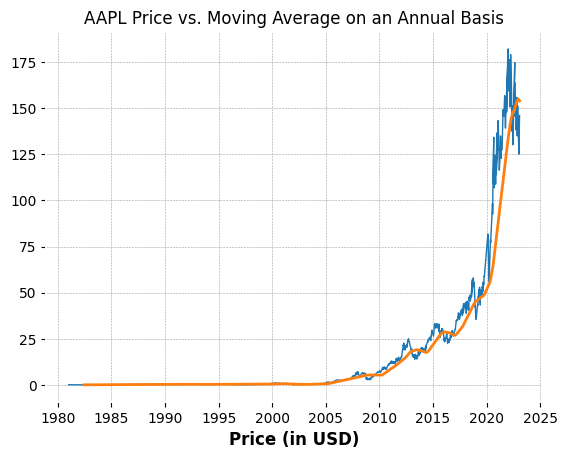

In [42]:
#2. ##Statistical Analysis

###Compute summary statistics (mean, median, standard deviation) for key columns.

####Option 1:
df.describe()

####Option 2:

print("\nDetailed Statistics with .agg():")
summary_stats = df.agg({
    'Open': ['mean', 'median', 'std'],
    'High': ['mean', 'median', 'std'],
    'Low': ['mean', 'median', 'std'],
    'Close': ['mean', 'median', 'std'],
    'Volume': ['mean', 'median', 'std']
})
print(summary_stats)

###analyze closing prices with a moving average.
df['MovingAverage_365']=df['Close'].rolling(window=365).mean()
plt.plot(df['Date'], df['Close'], label='Closing Price', linewidth=1)
plt.plot(df['Date'], df['MovingAverage_365'], label='Closing Price', linewidth=2)
plt.title('AAPL Price vs. Moving Average on an Annual Basis')
plt.xlabel('Date')
plt.xlabel('Price (in USD)')
plt.show()

###Summary: Because we've 40 years of data, i consolidated MA into 365 intervals. While the plot shows the gradual upward trend, you can also compare against the closing price overall.

##2. Statistical Analysis

    ###Analysis: I plotted two different ways to achieve detailed statistics (blanket results using 'describe' vs a chart that shows the specifics across each column. What I found is that: open and close are much higher than the median, and the standard deviation was, very very high. This is consistent with the rapid rise in stock value.
    
    ###Analysis: When I plotted the moving average, I decided to group into annual / year - on year results (365 day intervals) because of the high data volume (40+ years). While the plot shows the gradual upward trend, you can also compare against the closing price overall.

In [45]:
#3. Hypothesis Testing: ###Execute a t-test to compare average closing prices across different years.
from scipy.stats import ttest_ind

#pick two years

year_1 = 1995
year_2 = 2015

close_1995 = df[df['Year'] == year_1]['Close']
close_2015 = df[df['Year'] == year_2]['Close']

t_stat, p_value = ttest_ind(close_1995, close_2015, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


###Analysis: Conclusion: Reject H0 (p < 0.05) since there is statistic significance to the difference in average closing prices
alpha = 0.05
if p_value < alpha:
    # TODO: Complete the conclusion for rejecting H0
    print(f"\nConclusion: Reject H0 (p < {alpha}) since there is statistic significance to the difference in average closing prices")
else:
    # TODO: Complete the conclusion for failing to reject H0
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha}) since there is no statistical significant difference between average closing prices")



T-statistic: -244.97170291180697
P-value: 6.159629057282228e-301

Conclusion: Reject H0 (p < 0.05) since there is statistic significance to the difference in average closing prices


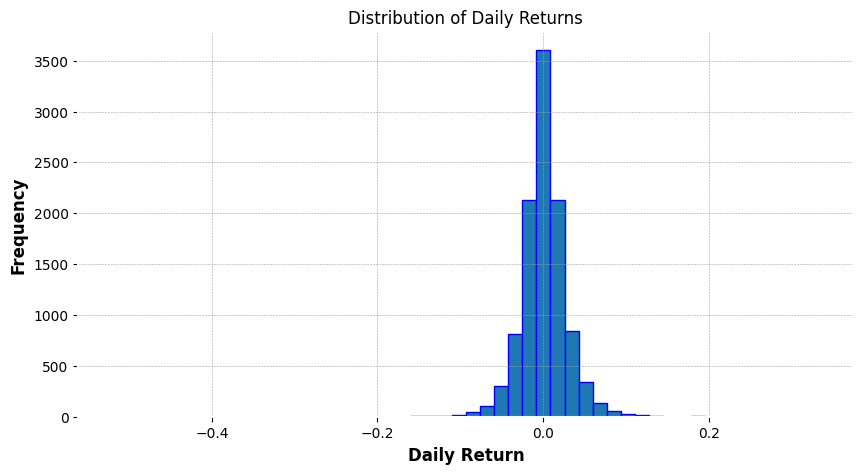

In [50]:
#Examine daily returns’ distribution and test for normality using SciPy.

df["Daily Return"]= df["Adj Close"].pct_change() #get the formula

plt.figure(figsize=(10,5))
plt.hist(df["Daily Return"].dropna(), bins=50, edgecolor='blue')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

#didn't like results, so I"m going to use Adj CLose instead, but results are the same, which I guess is because it has to cover such a wide span of results (From the low AAPL prices in the 80s to the astronomical closing costs in the 2000s)


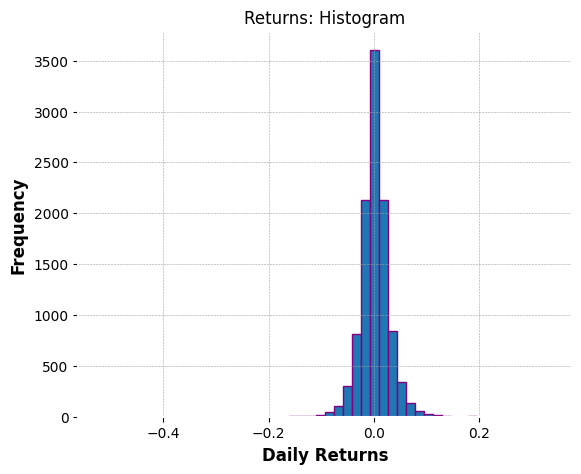

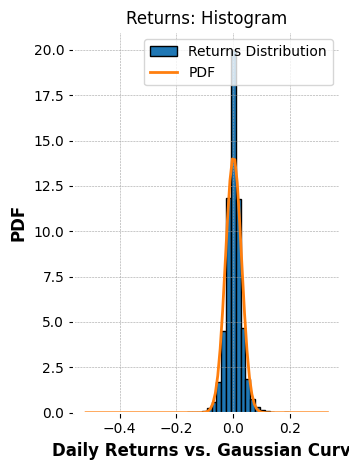

In [57]:
#test for nomality using SciPy

df["Daily Return"]= df["Adj Close"].pct_change() #get the formula
returns = df["Daily Return"].dropna()

mu = returns.mean()
sigma = returns.std()

x= np.linspace(returns.min(), returns.max(), 100)
pdf = stats.norm(mu,sigma).pdf(x)

#reference using gaussian layout

plt.figure(figsize=(14,5))

plt.subplot(1,2,1) #histogram of daily returns
plt.hist(returns, bins=50, edgecolor='purple')
plt.title("Returns: Histogram")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

plt.subplot(1,2,2)
plt.hist(returns, bins=50, density=True, edgecolor='black',label="Returns Distribution")
plt.plot(x, pdf, linewidth=2, label="PDF")
plt.title("Returns: Histogram")
plt.xlabel("Daily Returns vs. Gaussian Curve")
plt.ylabel("PDF")
plt. legend()
plt.tight_layout()
plt.show()


##3. Hypothesis Testing

    ###Analysis: I conducted a t-test for average closing prices in 1995 vs. 2015, and found that we can reject the null hypothesis since the p - value was less than the alpha. In other word,s there is a statistically significan tdifference in average closing prices across years.
  
    ###Analysis: I also tested using both 'close' and 'adj close' and found the results were consistent and somewhat strnage because of teh dramatic long-term price increase.

    ###Analysis: I calculated daily returns (percentage) and I used the "gaussian' curve to compare if it was a normal distribution. In short, it was not because of the volatility and rise in growth.

 ##4. Summary / Insights / Refletion

    ###Analysis: I included a summary of my finding following each section, and overall, I can say the following: overall, ruesults show that AAPL  stock has experience dstrong growth, financial behavior was volatile .